<a href="https://colab.research.google.com/github/franzjulian37/A17-18-Statistics-Probability-Stochastic-Processes/blob/main/%5BA18%5D_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

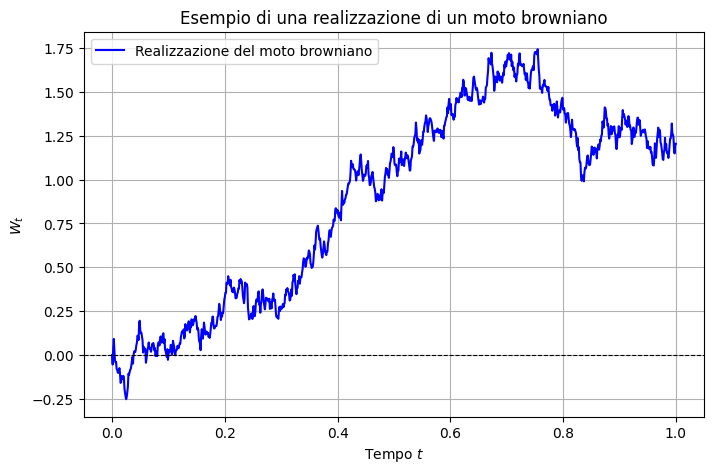

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della simulazione
T = 1.0   # Tempo totale
N = 1000  # Numero di passi
dt = T / N  # Passo temporale

# Generazione di una traiettoria di moto browniano
t = np.linspace(0, T, N+1)
W = np.zeros(N+1)
W[1:] = np.cumsum(np.sqrt(dt) * np.random.randn(N))

# Plot della realizzazione
plt.figure(figsize=(8, 5))
plt.plot(t, W, label="Realizzazione del moto browniano", color='b')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel("Tempo $t$")
plt.ylabel("$W_t$")
plt.title("Esempio di una realizzazione di un moto browniano")
plt.legend()
plt.grid(True)
plt.show()


# Confronto tra funzione deterministica e variabile casuale

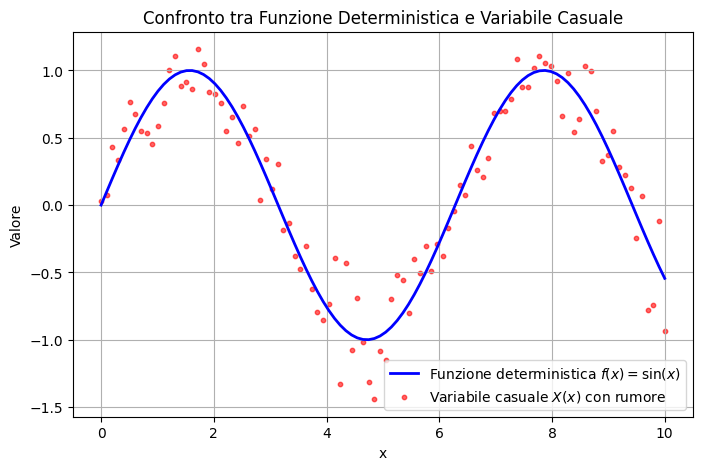

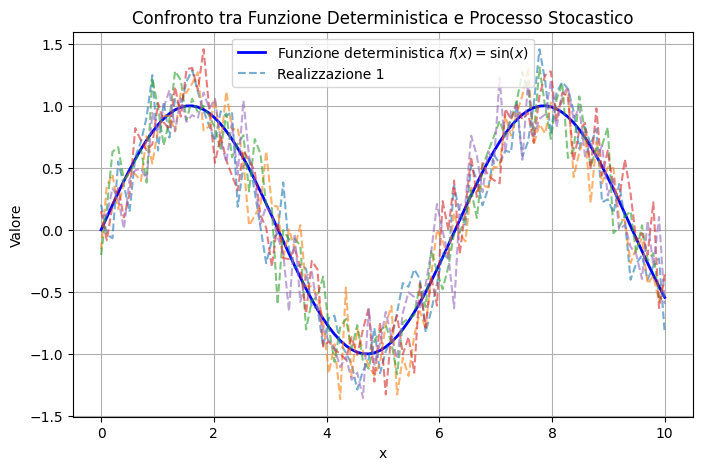

In [14]:
# Definiamo i punti x
x = np.linspace(0, 10, 100)

# Funzione deterministica: sin(x)
f_x = np.sin(x)

# Variabile casuale: ogni x ha un valore aleatorio N(sin(x), 0.2)
X_x = np.sin(x) + np.random.normal(0, 0.2, len(x))

# Creazione del grafico
plt.figure(figsize=(8, 5))
plt.plot(x, f_x, label="Funzione deterministica $f(x) = \sin(x)$", color='blue', linewidth=2)
plt.scatter(x, X_x, label="Variabile casuale $X(x)$ con rumore", color='red', alpha=0.6, s=10)

# Etichette e titolo
plt.xlabel("x")
plt.ylabel("Valore")
plt.title("Confronto tra Funzione Deterministica e Variabile Casuale")
plt.legend()
plt.grid(True)
plt.show()

# Numero di realizzazioni del processo stocastico
num_realizzazioni = 5

# Creiamo più realizzazioni di X(x)
X_realizzazioni = [np.sin(x) + np.random.normal(0, 0.2, len(x)) for _ in range(num_realizzazioni)]

# Creazione del grafico
plt.figure(figsize=(8, 5))

# Disegniamo la funzione deterministica
plt.plot(x, f_x, label="Funzione deterministica $f(x) = \sin(x)$", color='blue', linewidth=2)

# Disegniamo più realizzazioni del processo stocastico
for i in range(num_realizzazioni):
    plt.plot(x, X_realizzazioni[i], alpha=0.6, linewidth=1.5, linestyle='dashed', label=f"Realizzazione {i+1}" if i == 0 else "")

# Etichette e titolo
plt.xlabel("x")
plt.ylabel("Valore")
plt.title("Confronto tra Funzione Deterministica e Processo Stocastico")
plt.legend()
plt.grid(True)
plt.show()



# Simulazione numerica e grafico dell'integrale di un martingala

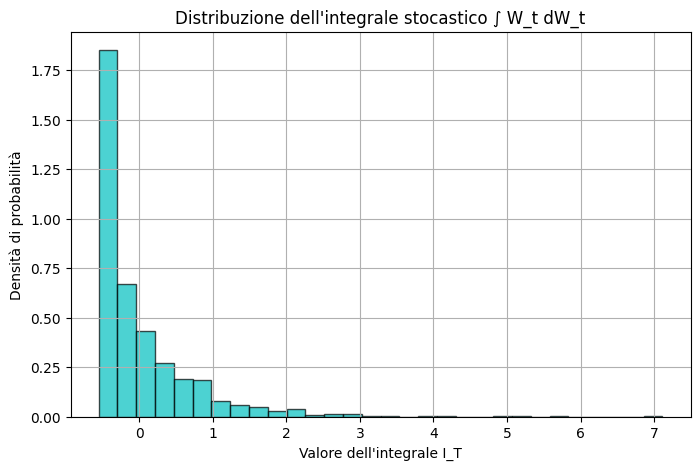

In [13]:
# Simulazione dell'integrale di Itô di un moto browniano W_t
np.random.seed(42)  # Per riproducibilità

T = 1.0  # Tempo finale
N = 1000  # Numero di passi
dt = T / N  # Passo temporale
num_simulazioni = 1000  # Numero di realizzazioni

# Simuliamo il moto browniano W_t per molte realizzazioni
W_t = np.zeros((num_simulazioni, N+1))  # Matrice per memorizzare i percorsi
for i in range(num_simulazioni):
    dW = np.random.normal(0, np.sqrt(dt), N)  # Incrementi normali
    W_t[i, 1:] = np.cumsum(dW)  # Calcoliamo W_t come somma cumulativa

# Calcoliamo l'integrale di Itô I_T = ∫ W_t dW_t per ogni realizzazione
I_T = np.zeros(num_simulazioni)
for i in range(num_simulazioni):
    I_T[i] = np.sum(W_t[i, :-1] * np.diff(W_t[i, :]))  # Approssimazione dell'integrale

# Grafico della distribuzione di I_T
plt.figure(figsize=(8, 5))
plt.hist(I_T, bins=30, density=True, alpha=0.7, color='c', edgecolor='black')
plt.xlabel("Valore dell'integrale I_T")
plt.ylabel("Densità di probabilità")
plt.title("Distribuzione dell'integrale stocastico ∫ W_t dW_t")
plt.grid(True)
plt.show()



# Somma discreta su una catena di markov
Ottenendo come risultato la distribuzione di probabilità del punto del percorso raggiunto dopo T step

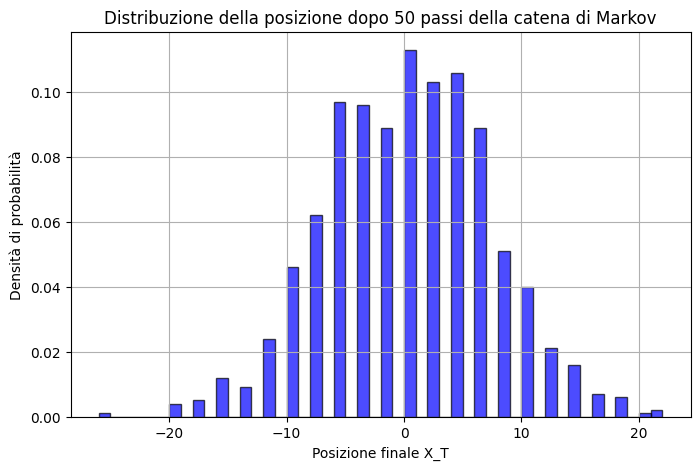

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della catena di Markov
N = 1000  # Numero di simulazioni
T = 50  # Numero di passi della catena
p = 0.5  # Probabilità di passo +1 (random walk simmetrico)

# Matrice per memorizzare i percorsi
X = np.zeros((N, T + 1))

# Generiamo le realizzazioni della catena di Markov (random walk)
for i in range(N):
    steps = np.random.choice([-1, 1], size=T, p=[1 - p, p])  # Scelte casuali +1 o -1
    X[i, 1:] = np.cumsum(steps)  # Somma cumulativa per ottenere il percorso

# Distribuzione finale della posizione X_T
final_positions = X[:, -1]

# Grafico della distribuzione della posizione finale
plt.figure(figsize=(8, 5))
plt.hist(final_positions, bins=range(int(min(final_positions)), int(max(final_positions)) + 1),
         density=True, alpha=0.7, color='b', edgecolor='black')

plt.xlabel("Posizione finale X_T")
plt.ylabel("Densità di probabilità")
plt.title(f"Distribuzione della posizione dopo {T} passi della catena di Markov")
plt.grid(True)
plt.show()


# Moto browniano geometrico

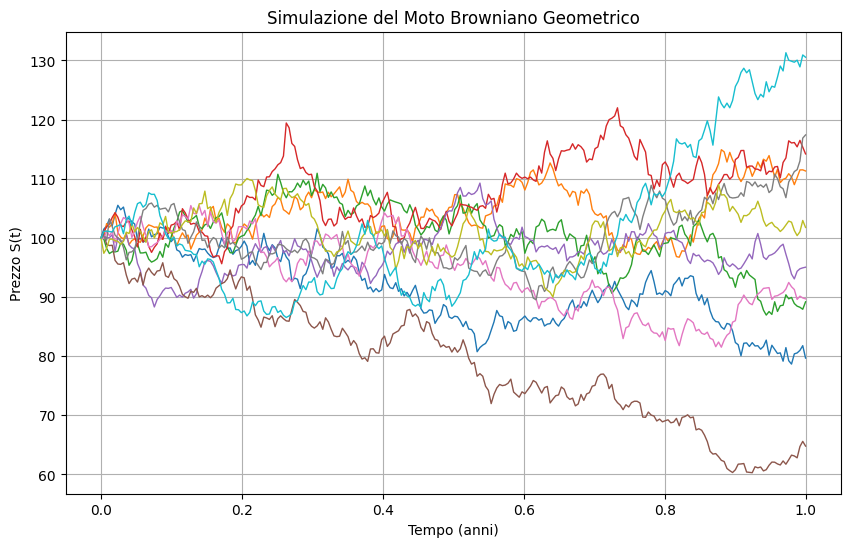

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello
S0 = 100      # Prezzo iniziale
mu = 0.1      # Drift (tasso di crescita atteso)
sigma = 0.2   # Volatilità
T = 1.0       # Orizzonte temporale (1 anno)
N = 252       # Numero di passi (giornalieri)
M = 10        # Numero di traiettorie

dt = T / N    # Passo temporale
t = np.linspace(0, T, N)  # Tempo

# Simulazione di M traiettorie di un GBM
S = np.zeros((M, N))
S[:, 0] = S0  # Condizione iniziale

for i in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt), M)  # Incrementi browniani
    S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# Grafico delle traiettorie
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, S[i, :], lw=1)
plt.xlabel('Tempo (anni)')
plt.ylabel('Prezzo S(t)')
plt.title('Simulazione del Moto Browniano Geometrico')
plt.grid()
plt.show()